# In this notebook we will do some more data preprocessing and step into Model Selection and Evaluation


## Tools we are going to use in this Notebook

1. Pandas, Numpy, MatlplotLib and Seaborn for data analysis, preprocessing and manipulation
2. From SciKit-Learn Library we use `RandomForestClassifier`, `LogisticRegression`, `GradientBoostingClassifier`, `KNeighborsClassifier`, & `DecisionTreeClassifier` for Modelling and we will select the best model after tuning and evaluation 

### Standard Imports :
(We will import more libraries in future if needed)

In [3]:
# For Data Analysis and Manipulation
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# We need out plots to appear inside the notebook
%matplotlib inline

# Models form SciKit-Learn 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# For Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from scipy.stats import stats

# For Evaluation
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
data = pd.read_csv("modelling-data-final.csv")
data.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Female
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Region_Code,28,3,28,11,41
Previously_Insured,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No
Annual_Premium,40454,33536,38294,28619,27496
Policy_Sales_Channel,26,26,26,152,152
Vintage,217,183,27,203,39


In [5]:
data_column_names = {"Gender",           
                     "Age",             
                     "Driving_License",
                     "Region_Code",
                     "Previously_Insured",
                     "Vehicle_Age",
                     "Vehicle_Damage",
                     "Annual_Premium",
                     "Policy_Sales_Channel",
                     "Vintage ",
                     "Response"                  
                     }

In [6]:
object_column = data.select_dtypes(include=['object']).columns
object_column

Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object')

## Turn Categorical Features into numbers 
**We are using OneHotEncoder**
> Before that we will split the data into X and y

**Split into X & y**

In [7]:
X_1 = data.drop("Response", axis=1)
y_1 = data["Response"]

In [8]:
# X Before transforming
X_1.head().T

,0,1,2,3,4
Gender,Male,Male,Male,Male,Female
Age,44,76,47,21,29
Driving_License,1,1,1,1,1
Region_Code,28,3,28,11,41
Previously_Insured,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No
Annual_Premium,40454,33536,38294,28619,27496
Policy_Sales_Channel,26,26,26,152,152
Vintage,217,183,27,203,39


**Using OneHotEncoder**

In [9]:
# Name the categorical features in a list
categorical_features = ["Gender", "Vehicle_Age", "Vehicle_Damage" ]

# Instantiate OneHotEncoder and ColumnTransformer 
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                remainder = "passthrough")

# Converting features
transformed_X = transformer.fit_transform(X_1)

In [10]:
# X After transforming
(pd.DataFrame(transformed_X)).head().T

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0
4,1.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,1.0,1.0
6,1.0,0.0,1.0,0.0,0.0
7,44.0,76.0,47.0,21.0,29.0
8,1.0,1.0,1.0,1.0,1.0
9,28.0,3.0,28.0,11.0,41.0


In [11]:
dummies = pd.get_dummies(data[["Gender", "Vehicle_Age", "Vehicle_Damage"]])
dummies.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
Gender_Female,0,0,0,0,1,1,0,1,1,1,1
Gender_Male,1,1,1,1,0,0,1,0,0,0,0
Vehicle_Age_1-2 Year,0,1,0,0,0,0,0,1,0,0,1
Vehicle_Age_< 1 Year,0,0,0,1,1,1,1,0,1,1,0
Vehicle_Age_> 2 Years,1,0,1,0,0,0,0,0,0,0,0
Vehicle_Damage_No,0,1,0,1,1,0,0,0,1,1,0
Vehicle_Damage_Yes,1,0,1,0,0,1,1,1,0,0,1


**Quick Set-Up**

In [12]:
X_2 = transformed_X
y_2 = y_1

### Class Imbalance in the Target column

Text(0, 0.5, 'Population')

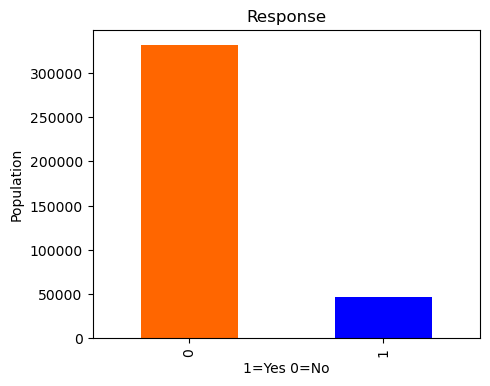

In [13]:
fig, ax = plt.subplots(figsize=(5, 4))

data["Response"].value_counts().plot(kind="bar", color=["#FF6600", "blue"])
ax.set_title("Response")
ax.set_xlabel("1=Yes 0=No")
ax.set_ylabel("Population")

**We can use SMOTE technique to handle class imbalance**

## Applying SMOTE for class imbalance

**Instantiate SMOTE and fit X_2, y_2**

In [14]:
smote = SMOTE(sampling_strategy = 'minority')
X_sm, y_sm = smote.fit_resample(X_2, y_2)
y_sm.value_counts()

1    332638
0    332638
Name: Response, dtype: int64

**Scaling our data to fit into Logistic Regression**

In [15]:
# Instantiate StandardScaler and scale the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)

### Now we have all the data preprocessed and it is ready to fit in a model
> In the previous notebook we had selected 3 major best scoring models. Here we are going to tune those models and evaluate them

We're going to try and adjust :
1. `max_depth`
2. `max_features`
3. `min_samples_leaf`
4. `min_samples_split`
5. `n_estimators`

#### 1. Split the data into X and y

In [16]:
X = X_scaled
y = y_sm

#### 2. Split the data into Train and Test split

In [17]:
# Set-up Random seed
np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # We have split the data into 70% and 30%

In [18]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

##  Feature Selection
> Before we build a model we need our data to be compact so we will do some Dimensionality Reduction

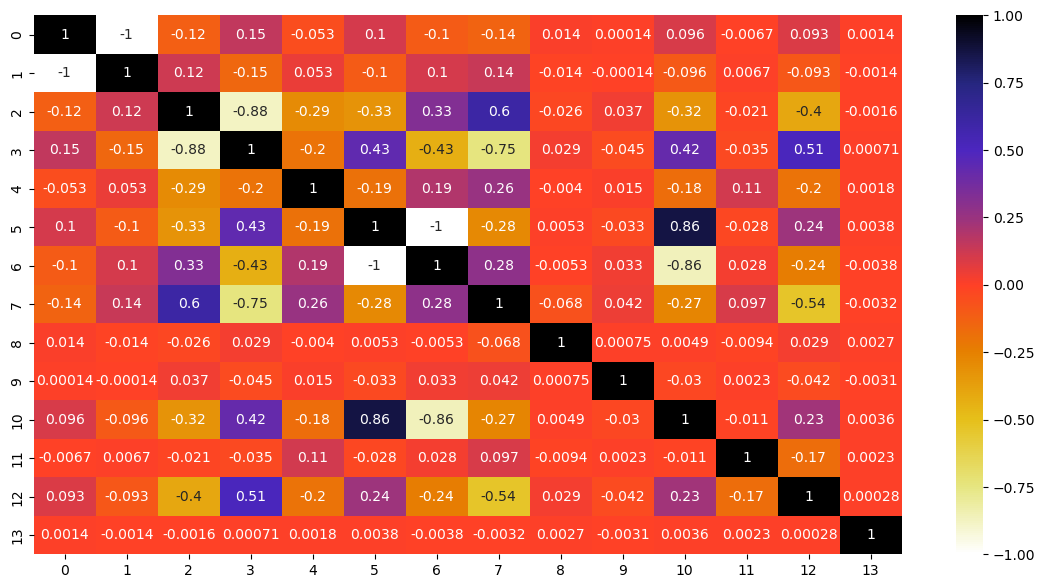

In [19]:
plt.figure(figsize=(14, 7))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show();

## Pearson Correlation

In [20]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # We are interested in absolute coeff value.
                colname = corr_matrix.columns[j]  # Getting the name of the column j
                col_corr.add(colname)

    return col_corr

In [21]:
corr_features = correlation(X_train, 0.7)
print("No. of features can be eliminated: ", len(set(corr_features)))
print(corr_features)

No. of features can be eliminated:  5
{0, 2, 3, 5, 6}


In [22]:
# Dropping those columns
X_train = X_train.drop(corr_features, axis = 1)
X_test = X_test.drop(corr_features, axis = 1)

**Based on the previous tests we had came to a conclusion that we may tune and evaluate :**
1. `Random Forest`
2. `Decision Tree`
3. `Gradient Boosting`

In [23]:
# Setup random seed
np.random.seed(42)

# Instantiate Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100)

# Fit the model to the data (training the machine learning model)
clf.fit(X_train, y_train)

# Evaluate the Random Forest Classifier (use the patterns the model has learned)
clf.score(X_test, y_test)

0.9142862869082036

In [24]:
y_preds = clf.predict(X_test)
accuracy_score(y_test, y_preds)

0.9142862869082036

In [25]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     99691
           1       0.93      0.90      0.91     99892

    accuracy                           0.91    199583
   macro avg       0.91      0.91      0.91    199583
weighted avg       0.91      0.91      0.91    199583



In [26]:
# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")


Classifier metrics on the test set
Accurracy: 91.43%
Precision: 0.9303962650639993
Recall: 0.8957574180114524
F1: 0.9127483232601433


# PART 2 `Model Tuning`

##### From the previous notebook we got the best  hyperparameters from `RandomizedSearchCV` so we will fit the models using those parameters

### 1. Random Forest Classifier 

In [27]:
%%time
# Set-up random HyperParameter search for RandomForestClassifier
rs_rf = RandomForestClassifier(n_estimators = 10,
                               min_samples_split = 10,
                               min_samples_leaf = 9,
                               max_depth = 10)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

CPU times: total: 8.41 s
Wall time: 8.57 s


RandomForestClassifier(max_depth=10, min_samples_leaf=9, min_samples_split=10,
                       n_estimators=10)

### 2. Decision Tree 

In [28]:
%%time
# Set-up random HyperParameter search for Decision Tree
dt_rs = DecisionTreeClassifier(min_samples_split = 2,
                               min_samples_leaf = 4,
                               max_features = 'sqrt',
                               max_depth = 5,
                               criterion = 'gini')
# Fit random hyperparameter search model for Decision Tree
dt_rs.fit(X_train, y_train)

CPU times: total: 688 ms
Wall time: 722 ms


DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=4)

### 3. GradientBoostingClassifier 

In [29]:
%%time
# Set-up random HyperParameter search for GradientBoostingClassifier
gbc_rs = GradientBoostingClassifier(n_estimators = 10,
                                    min_samples_split = 10,
                                    min_samples_leaf = 7,
                                    max_features = 'sqrt',
                                    max_depth = None)
# Fit random hyperparameter search model for GradientBoostingClassifier
gbc_rs.fit(X_train, y_train)

CPU times: total: 2min 16s
Wall time: 2min 21s


GradientBoostingClassifier(max_depth=None, max_features='sqrt',
                           min_samples_leaf=7, min_samples_split=10,
                           n_estimators=10)

### 4. Decision Tree using different hyperparameters 

In [30]:
%%time
# Set-up random HyperParameter search for Decision Tree
dt_gs_2 = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = None,
                                 max_features = None,
                                 min_samples_leaf = 4,
                                 min_samples_split = 2)

# Fit random hyperparameter search model for Decision Tree
dt_gs_2.fit(X_train, y_train)

CPU times: total: 4.14 s
Wall time: 4.24 s


DecisionTreeClassifier(min_samples_leaf=4)

In [31]:
scores = {"Random Forest" : rs_rf.score(X_test, y_test),
          "Decision Tree" : dt_rs.score(X_test, y_test),
          "Decision Tree 2" : dt_gs_2.score(X_test, y_test),
          "Gradient Boosting" : gbc_rs.score(X_test, y_test)  
         }
tuned_scores = pd.DataFrame(scores, index = [1])

In [32]:
tuned_scores

,Random Forest,Decision Tree,Decision Tree 2,Gradient Boosting
1,0.851991,0.750455,0.901505,0.907131


In [33]:
best_models = { "Model_1": "DecisionTree",
                "Model_2": "GradientBoosting"
              }

# Part 3 `Model Training`

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Model 1 Decision Tree

In [35]:
# Model 1 = Decision Tree 
model_1 = DecisionTreeClassifier(criterion = 'gini',
                                 max_depth = None,
                                 max_features = None,
                                 min_samples_leaf = 4,
                                 min_samples_split = 2)
model_1.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model_1.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
y_test_pred = model_1.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.8996124072622639
Test Accuracy: 0.8998612106241514


### Model 2 Gradient Boosting Classifier

In [36]:
# Model 2 = Gradient Boosting 
model_2 = GradientBoostingClassifier(n_estimators = 10,
                                     min_samples_split = 10,
                                     min_samples_leaf = 7,
                                     max_features = 'sqrt',
                                     max_depth = None)
model_2.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = model_2.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
y_test_pred = model_2.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.9048304147564393
Test Accuracy: 0.9042904455790323


## Evaluating our tuned Machine Learning model

* ROC curve and AUC Score
* Confusion Matrix
* Precision
* Recall
* F1 Score

To make comparisions and evaluate our trained model, first we need to make predictions.

# 1. Evaluating Model 1

## Function For Plotting `ROC` curve

ROC curve are a ccomparision of model's True Positive Rate (TPR) versus False Positive Rate (FPR).

#### Plotting setup for Model_1

In [37]:
# Make prediction with tuned models
y_preds_1 = model_1.predict(X_test)
y_preds_1

# Make Predictions with Probablities
y_probs_1 = model_1.predict_proba(X_test)

# Get only y_probs positive values
y_probs_positive_1 = y_probs_1[:, 1]

# Calculate FPR, TPR & Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive_1)

## Function for ROC Curve 

In [38]:
# Defining a function
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC Curve given the False Positive Rate (fpr) and True Positive Rate (tpr) of a Model
    """
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, color = "orange", label = "ROC")
    
    # Plot a Line 
    plt.plot([0, 1], [0, 1], color = "darkblue", linestyle = "--", label = "guessing")
    
    # Customize the plot
    plt.title("Reciever Operating Characterstic (ROC) Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.legend()
    plt.show()

## 1. Plotting ROC Curve & AUC Score

DecisionTree(AUC score = 0.94)


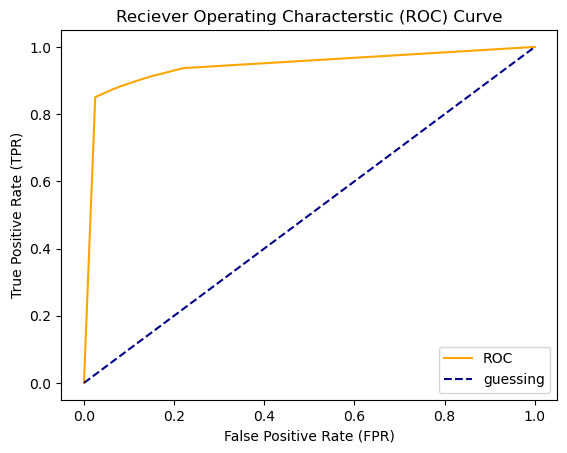

In [39]:
auc = metrics.roc_auc_score(y_test, (y_probs_1[::,1]))
print(f"DecisionTree(AUC score = {(auc):.2f})")
plot_roc_curve(fpr, tpr)

## 2. Confision Matrix

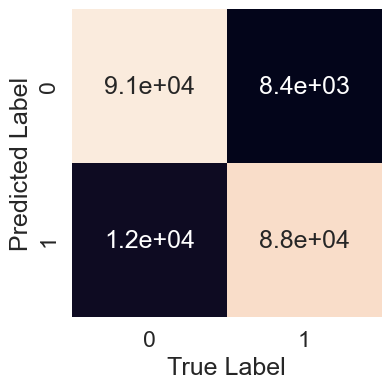

In [40]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds_1):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the width and height as needed
    sns.heatmap(confusion_matrix(y_test, y_preds_1),
                annot=True,
                cbar=False,
                ax=ax)
    ax.set_xlabel("True Label")
    ax.set_ylabel("Predicted Label")
    plt.show()
    
plot_conf_mat(y_test, y_preds_1)

## 3. Calculate Evaluation Metrics Using Cross Validation 

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score().`

In [41]:
# Cross-Validated accuracy
cv_acc_1 = cross_val_score(model_1, X, y, cv=5, scoring="accuracy")
cv_acc_1 = np.mean(cv_acc_1)
cv_acc_1

0.8908666850166606

In [42]:
# Cross-Validated precision
cv_precision_1 = cross_val_score(model_1, X, y, cv=5, scoring="precision")
cv_precision_1 = np.mean(cv_precision_1)
cv_precision_1

0.9236341277971423

In [43]:
# Cross-Validated recall
cv_recall_1 = cross_val_score(model_1, X, y, cv=5, scoring="recall")
cv_recall_1 = np.mean(cv_recall_1)
cv_recall_1

0.8596409886811717

In [44]:
# Cross-Validated f1-score
cv_f1_1 = cross_val_score(model_1, X, y, cv=5, scoring="f1")
cv_f1_1 = np.mean(cv_f1_1)
cv_f1_1

0.8607458063249007

In [45]:
# Visualize cross-validated metrics
cv_metrics_1 = pd.DataFrame({"Accuracy" : cv_acc_1,
                             "Precision" : cv_precision_1,
                             "Recall" : cv_recall_1,
                             "F1" : cv_f1_1
                            },
                            index = [0])

In [46]:
cv_metrics_1

,Accuracy,Precision,Recall,F1
0,0.890867,0.923634,0.859641,0.860746


# 2. Eavaluating Model 2

#### Plotting setup for Model_2

In [47]:
# Make prediction with tuned models
y_preds_2 = model_2.predict(X_test)
y_preds_2

# Make Predictions with Probablities
y_probs_2 = model_2.predict_proba(X_test)

# Get only y_probs positive values
y_probs_positive_2 = y_probs_2[:, 1]

# Calculate FPR, TPR & Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive_2)

## 1. Plotting ROC Curve & AUC Score

GradientBoosting(AUC score = 0.97)


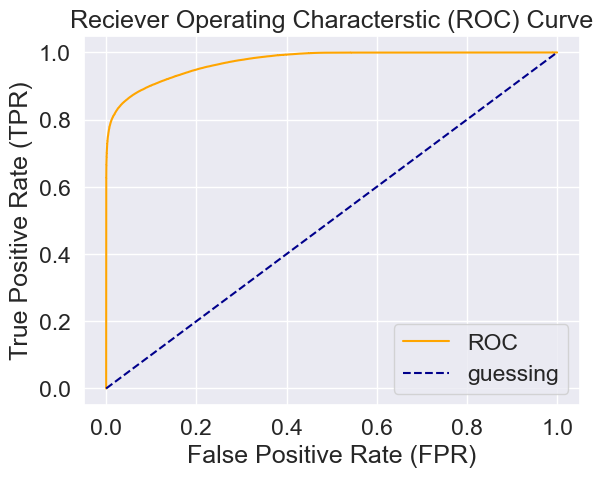

In [48]:
auc = metrics.roc_auc_score(y_test, (y_probs_2[::,1]))
print(f"GradientBoosting(AUC score = {(auc):.2f})")
plot_roc_curve(fpr, tpr)

## 2. Confision Matrix

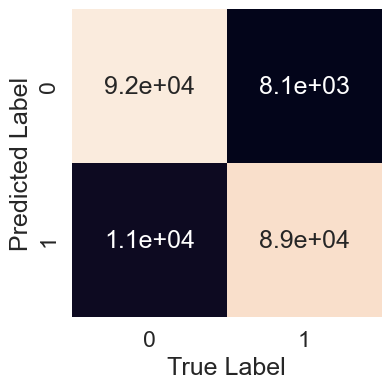

In [49]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds_2):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(4, 4))  # Adjust the width and height as needed
    sns.heatmap(confusion_matrix(y_test, y_preds_2),
                annot=True,
                cbar=False,
                ax=ax)
    ax.set_xlabel("True Label")
    ax.set_ylabel("Predicted Label")
    plt.show()
    
plot_conf_mat(y_test, y_preds_2)

## 3. Calculate Evaluation Metrics Using Cross Validation 

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score().`

In [50]:
# Cross-Validated accuracy
cv_acc_2 = cross_val_score(model_2, X, y, cv=5, scoring="accuracy")
cv_acc_2 = np.mean(cv_acc_2)
cv_acc_2

0.8896701647110783

In [51]:
# Cross-Validated precision
cv_precision_2 = cross_val_score(model_2, X, y, cv=5, scoring="precision")
cv_precision_2 = np.mean(cv_precision_2)
cv_precision_2

0.9133375910244107

In [52]:
# Cross-Validated recall
cv_recall_2 = cross_val_score(model_2, X, y, cv=5, scoring="recall")
cv_recall_2 = np.mean(cv_recall_2)
cv_recall_2

0.8650041235287638

In [53]:
# Cross-Validated f1-score
cv_f1_2 = cross_val_score(model_2, X, y, cv=5, scoring="f1")
cv_f1_2 = np.mean(cv_f1_2)
cv_f1_2

0.8638986378039695

In [54]:
# Visualize cross-validated metrics
cv_metrics_2 = pd.DataFrame({"Accuracy" : cv_acc_2,
                             "Precision" : cv_precision_2,
                             "Recall" : cv_recall_2,
                             "F1" : cv_f1_2
                            },
                            index = [0])

In [55]:
cv_metrics_2

,Accuracy,Precision,Recall,F1
0,0.88967,0.913338,0.865004,0.863899


## Feature Importance

Feature Importance is another way of asking, "which features contributed most to the outcomes of the model and how did they contribute ?"

Finding feature importance is different for each machine learning model

Let's find the feature importance for our LogisticRegression Model


In [56]:
# Check coefficient for Model 1
importance_1 = model_1.feature_importances_
importance_1

array([1.22762678e-01, 3.20383384e-02, 1.77804946e-01, 4.30610076e-05,
       1.23598603e-01, 3.95482411e-01, 5.05484407e-02, 4.28374195e-02,
       5.48841032e-02])

In [57]:
# Match coef's of features to columns
feature_dict_1 = dict(zip(data.columns, importance_1))

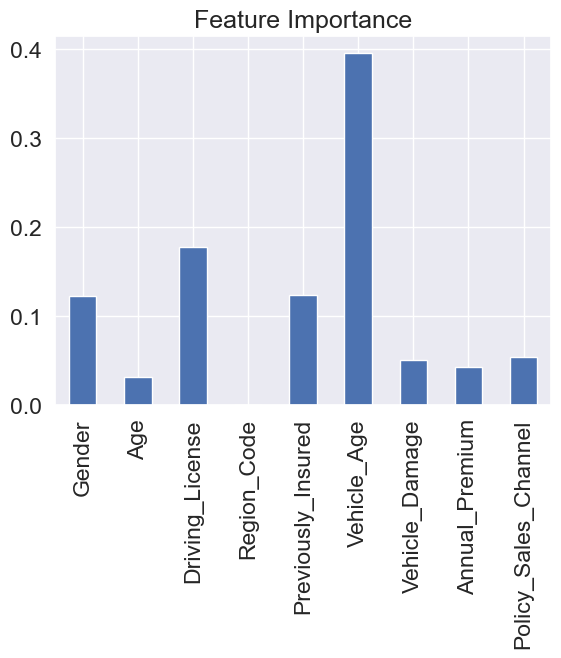

In [58]:
# Visualize feature importance
feature_df_1 = pd.DataFrame(feature_dict_1, index=[0])
feature_df_1.T.plot.bar(title="Feature Importance", legend=False);

In [59]:
# Check coefficient for Model 2
importance_2 = model_2.feature_importances_
importance_2

array([0.15530356, 0.03946253, 0.20239206, 0.00054294, 0.08083025,
       0.3054652 , 0.04378878, 0.12661119, 0.04560349])

In [60]:
# Match coef's of features to columns
feature_dict_2 = dict(zip(data.columns, importance_2))

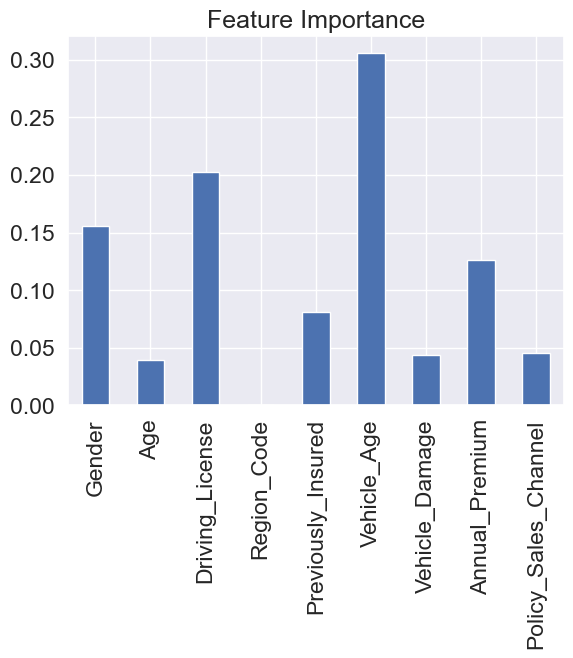

In [61]:
# Visualize feature importance
feature_df_2 = pd.DataFrame(feature_dict_2, index=[0])
feature_df_2.T.plot.bar(title="Feature Importance", legend=False);

In [62]:
feature_dict_2

{'Gender': 0.15530356098355075,
 'Age': 0.03946253421868692,
 'Driving_License': 0.20239205909563476,
 'Region_Code': 0.0005429428694068333,
 'Previously_Insured': 0.08083025465713356,
 'Vehicle_Age': 0.3054651965660762,
 'Vehicle_Damage': 0.04378877655852361,
 'Annual_Premium': 0.12661118831759408,
 'Policy_Sales_Channel': 0.04560348673339321}

### Tuned Scores

In [63]:
tuned_scores

,Random Forest,Decision Tree,Decision Tree 2,Gradient Boosting
1,0.851991,0.750455,0.901505,0.907131


### Evaluation metrics for Decision tree with best parameters

In [64]:
cv_metrics_1

,Accuracy,Precision,Recall,F1
0,0.890867,0.923634,0.859641,0.860746


### Evaluation metrics for Gradient Boosting Classifier with best parameters

In [65]:
cv_metrics_2

,Accuracy,Precision,Recall,F1
0,0.88967,0.913338,0.865004,0.863899


**Our Selected models** 
1. model_1 = Decision Tree
2. model_2 = Gradient Boosting Classifier

# Saving and Loading Our Machine Learning Models

In [69]:
data = pd.read_csv("modelling-data-final.csv")

In [68]:
import pickle

# Save an existing model to file
pickle.dump(model_1, open("model_1_decision_tree.pkl", "wb"))
pickle.dump(model_2, open("model_2_gradient_boosting_clf.pkl", "wb"))

# Putting it Altogether
**Steps to do :**
1. Turn Categorical Features Into Numbers
2. Applying SMOTE for Class Imbalance
3. Scaling the Data
4. Feature Selection
5. Hyper Parameter Tuning

In [ ]:
# # Getting Data Ready
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import PipeLine

# # Model 1
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

# # Setup Random Seed
# import numpy as np
# np.random.seed(42)

# # Import the data
# data = pd.read_csv("modelling-data-final.csv")
